# Data Wrangling and Analysis of Twitter Dog Ratings

## Problem Statement
In this project, we will be working with two datasets: the WeRateDogs Twitter archive data and the Labor Market data. The WeRateDogs dataset is a collection of tweets with dog ratings, including information such as tweet text, timestamp, source, expanded URLs, dog rating out of ten, dog name, and dog category. On the other hand, the Labor Market dataset focuses on wage information for specific job roles, hourly wage rates, and gender-related statistics.

By analyzing these datasets, we aim to explore the relationship between public sentiment towards dogs on Twitter and certain aspects of the labor market. Some research questions we would like to answer include:

Is there a correlation between the ratings given to dogs on Twitter and the wage rates of specific job roles?
Are there any gender-related patterns in the dog ratings and wage rates?
To conduct this analysis, we will combine the two datasets based on common variables, such as occupation codes or other relevant identifiers, allowing us to examine the connection between dog ratings and labor market factors.

## Data Gathering
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

## Dataset

1). Dataset 1: Twitter Data

Method: The Twitter data was gathered by directly downloading it in CSV format from the WeRateDogs Twitter archive.

Dataset Significance: The variables in the dataset include tweet ID, timestamp, source, tweet text, expanded URLs, dog rating out of ten, dog name, and dog category. These variables provide essential information for analyzing and classifying the dog ratings on Twitter.


2). Dataset 2: Labor Market Data

Method: The Labor Market Data was gathered by accessing and downloading it from the Bureau of Labor Statistics website.

Dataset Significance: The variables in the dataset include job title, wage rate, and gender. These variables provide valuable information for understanding the labor market and its potential relationship to dog ratings.

### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
import pandas as pd
import numpy as np


In [13]:
import os
print(os.getcwd())


c:\Users\m30al\AppData\Local\Temp\507aa069-644f-4fc6-a594-150b046c5689_Data Wrangling and Analysis of Twitter Dog Ratings.zip.689


In [16]:
df_archive = pd.read_csv(r'C:\Users\m30al\Downloads\twitter-archive-enhanced.csv.csv')
df_archive.head()


,Unnamed: 0,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category
0,0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN
1,1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN
2,2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN
3,3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN
4,4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url, auth=('user', 'pass'))
with open("image_predictions1.tsv" , 'wb') as f:
    f.write(r.content)

In [5]:
df_images = pd.read_csv("image_predictions1.tsv" , sep="\t")
df_images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [197]:
# I was unable to register a developer account on Twitter because it demanded a phone number,
# and my number was already associated with a previous account that I can't access.
# Therfore i will access the data from the url that been given using the request libary

url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
r = requests.get(url)
with open("tweet-json.txt" , 'wb') as f:
    f.write(r.content)
# with open("tweet-json.txt" , 'r') as read:
#     tweet_json = read.readline()
# tweet_json

In [7]:
df_tweets = pd.read_json('tweet-json.txt',lines=True)
df_tweets = df_tweets[['id', 'favorite_count', 'retweet_count']]
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Assessing Data Quality Issues:**

1. Visual Assessment:
   - Check for duplicate tweet IDs.
   - Check for retweets and ensure you have only original tweets.
   - Look for missing or incorrect dog names.
   - Identify tweets without images.

2. Programmatic Assessment:
   - Analyze the data types of columns, ensuring they match the content (e.g., timestamp should be in datetime format).
   - Examine rating numerators and denominators for unrealistic values.
   - Check for missing ratings or ratings in decimal form.

**Assessing Data Tidiness Issues:**

1. Visual Assessment:
   - Examine the `doggo`, `floofer`, `pupper`, and `puppo` columns to ensure they are correctly categorized.
   - Identify tweets with more than one dog stage or no dog stage.

2. Programmatic Assessment:
   - Check if there are unnecessary or redundant columns.
   - Examine the presence of duplicate columns after merging datasets.

By using a combination of visual and programmatic assessments, you can identify and document quality and tidiness issues in your dataset effectively.

### Twitter Archive data

In [178]:
df_archive.sample(10)

,Unnamed: 0,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category
1279,1279,700890391244103680,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,https://twitter.com/dog_rates/status/700890391...,11.0,Chet,None
8,8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,None
1627,1627,674999807681908736,2015-12-10 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,https://twitter.com/dog_rates/status/674999807...,13.0,NaN,None
1328,1328,695816827381944320,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,https://twitter.com/dog_rates/status/695816827...,11.0,NaN,None
682,682,786729988674449408,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,https://twitter.com/dog_rates/status/759447681...,11.0,Oakley,None
1484,1484,683098815881154561,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,https://twitter.com/dog_rates/status/683098815...,12.0,NaN,None
271,271,840728873075638272,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,https://twitter.com/dog_rates/status/667152164...,12.0,Pipsy,None
272,272,840698636975636481,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,10.0,NaN,None
424,424,821044531881721856,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,https://twitter.com/dog_rates/status/821044531...,12.0,Flash,None
251,251,844704788403113984,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13.0,Luna,None


### many rows have no stage of the dog

In [9]:
df_archive.describe()

,Unnamed: 0,tweet_id,dog_rating_out_of_ten
count,1899.000000,1.899000e+03,1899.000000
mean,949.000000,7.551383e+17,13.341906
std,548.338399,6.901044e+16,45.357220
min,0.000000,6.660508e+17,9.750000
25%,474.500000,6.874785e+17,11.000000
50%,949.000000,7.493958e+17,12.000000
75%,1423.500000,8.151885e+17,12.000000
max,1898.000000,8.924206e+17,1776.000000


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1899 non-null   int64  
 1   tweet_id               1899 non-null   int64  
 2   tweet_timestamp        1899 non-null   object 
 3   source                 1899 non-null   object 
 4   tweet_text             1899 non-null   object 
 5   expanded_urls          1853 non-null   object 
 6   dog_rating_out_of_ten  1899 non-null   float64
 7   dog_name               1311 non-null   object 
 8   dog_category           1899 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### There some wrong formats such as timestamp

In [23]:
df_archive.dog_name.value_counts()

a          29
Charlie    12
Lucy       10
Cooper     10
Oliver     10
           ..
Angel       1
Brat        1
Tove        1
my          1
Lugan       1
Name: dog_name, Length: 814, dtype: int64


### There are some Wrong names such as 'a''the'


In [12]:
df_archive[df_archive.tweet_id.duplicated()]

,Unnamed: 0,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category


In [13]:
pd.options.display.max_colwidth = 50
df_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [24]:
df_archive.tweet_text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [26]:
df_archive.dog_rating_out_of_ten.value_counts()

12.00      558
11.00      463
10.00      461
13.00      351
14.00       54
420.00       2
15.00        2
17.00        1
666.00       1
182.00       1
9.75         1
75.00        1
11.27        1
1776.00      1
11.26        1
Name: dog_rating_out_of_ten, dtype: int64

### Image Prediction data

In [27]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Around 60% confident on the first prediction, not bad

In [28]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_images[df_images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
df_images.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True


In [31]:
df_images['p1'].value_counts().nlargest(5)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

In [32]:
df_images['p2'].value_counts().nlargest(5)

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: p2, dtype: int64

### Twitter API data

In [33]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [34]:
df_tweets[df_tweets.id.duplicated()]

,id,favorite_count,retweet_count


In [35]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000




**Twitter-archive Data Quality Issues:**

1. **Missing expanded URLs:** Some entries lack image URLs in the 'expanded_urls' column, making it impossible to access the images.

2. **Retweets:** The dataset contains retweets, which need to be removed to retain only original tweets.

3. **Unwanted Columns:** Several columns, such as 'in_reply_to_status_id' and 'in_reply_to_user_id,' are irrelevant to the analysis and can be removed.

4. **Invalid Dog Names:** The 'name' column has incorrect entries, including names like 'a' and 'None.'

5. **Timestamp Data Type:** The 'timestamp' column is of object data type, and it should be converted to a datetime format.

6. **Inconsistent Dog Ratings:** Some dog ratings have a higher denominator than the numerator, which may not be accurate.

7. **Source Information:** The 'source' column contains non-essential information about the tweet's source.

**Twitter-archive Tidiness Issues:**

1. **Dog Stages:** The dog stages ('doggo,' 'floofer,' 'pupper,' and 'puppo') belong to a single variable and should be melted into one column.

2. **Merge Data:** The Twitter-archive data is part of the same observational unit as the image predictions and tweet data. Merging these datasets would create a cleaner and more informative single table.

**Image Prediction Data Quality Issues:**

1. **Non-Dog Images:** Some entries in the image prediction data don't contain images of dogs and need to be removed.

2. **Undefined Dog Breeds:** There are entries with dog breeds labeled as 'orange,' which are not defined breeds.

**Image Prediction Data Tidiness Issue:**

1. **Merge Data:** The image prediction data is part of the same observational unit as the Twitter-archive data. Merging these datasets would create a more comprehensive table for analysis.

**Tweets Data Quality Issue:**

1. **Rename Column:** The column 'id' should be renamed to 'tweet_id' for consistency and easier merging with other datasets.

**Tweets Data Tidiness Issue:**

1. **Merge Data:** The tweets data is part of the same observational unit as the Twitter-archive and image prediction data. Merging these datasets into one single table is recommended for a more complete analysis.

### Cleaning Data
In this section, clean all of the issues you documented while assessing.

Note: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
df_archive_2 = df_archive.copy()
df_images_2 = df_images.copy()
df_tweets_2 = df_tweets.copy()

### 1. First - Twitter-archive data
Remove the retweet tweets from twitter-archive data

In [42]:
df_archive_2 = df_archive_2[df_archive_2.tweet_text.isnull()]

In [43]:
# Test no retweeted tweets.
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      int64  
 1   tweet_id               0 non-null      int64  
 2   tweet_timestamp        0 non-null      object 
 3   source                 0 non-null      object 
 4   tweet_text             0 non-null      object 
 5   expanded_urls          0 non-null      object 
 6   dog_rating_out_of_ten  0 non-null      float64
 7   dog_name               0 non-null      object 
 8   dog_category           0 non-null      object 
dtypes: float64(1), int64(2), object(6)
memory usage: 0.0+ bytes


### keep tweets which have their URLS

In [44]:
null_url = pd.notnull(df_archive_2["expanded_urls"])
df_archive_2 = df_archive_2[null_url]

In [45]:
# Test All tweets have their URLS
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             0 non-null      int64  
 1   tweet_id               0 non-null      int64  
 2   tweet_timestamp        0 non-null      object 
 3   source                 0 non-null      object 
 4   tweet_text             0 non-null      object 
 5   expanded_urls          0 non-null      object 
 6   dog_rating_out_of_ten  0 non-null      float64
 7   dog_name               0 non-null      object 
 8   dog_category           0 non-null      object 
dtypes: float64(1), int64(2), object(6)
memory usage: 0.0+ bytes


### Fix naming issues at (name) Column
There some words that could be a name therefore will just change (a,an,the,none) to None

In [180]:
non_names = ['a' , "an",'the','none']
df_archive_2["dog_name"] = df_archive_2["dog_name"].replace(non_names , "None")

In [181]:
# Test names are all valid
df_archive_2.dog_name.value_counts()

Series([], Name: dog_name, dtype: int64)

In [20]:
import pandas as pd

# Load the CSV file into a DataFrame
df_archive = pd.read_csv(r'C:\Users\m30al\Downloads\twitter-archive-enhanced.csv.csv')

column_name = 'dog_name'

if column_name in df_archive.columns:
    name_counts = df_archive[column_name].value_counts()
    print(name_counts)
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")


dog_name
a          29
Charlie    12
Lucy       10
Cooper     10
Oliver     10
           ..
Angel       1
Brat        1
Tove        1
my          1
Lugan       1
Name: count, Length: 814, dtype: int64


### Change timestamp to datetime type

In [85]:
df_archive_2['tweet_timestamp'] = pd.to_datetime(df_archive_2['tweet_timestamp'])

In [86]:
# Test the type of timestamp column
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             0 non-null      int64         
 1   tweet_id               0 non-null      int64         
 2   tweet_timestamp        0 non-null      datetime64[ns]
 3   source                 0 non-null      object        
 4   tweet_text             0 non-null      object        
 5   expanded_urls          0 non-null      object        
 6   dog_rating_out_of_ten  0 non-null      float64       
 7   dog_name               0 non-null      object        
 8   dog_category           0 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 108.0+ bytes


### Create a new column (rating) from dividing rating_numerator from rating_denominator and multiply by 10.

In [90]:
df_archive_2["expanded_urls"] = (df_archive_2["dog_rating_out_of_ten"] / df_archive_2["dog_rating_out_of_ten"])*10
df_archive_2["expanded_urls"] = df_archive_2["expanded_urls"].astype(int)

In [10]:
import pandas as pd

df_archive_2 = pd.read_csv(r'C:\Users\m30al\Downloads\twitter-archive-enhanced.csv.csv')

rating_counts = df_archive_2['dog_rating_out_of_ten'].value_counts()


In [26]:
# Import the Pandas library
import pandas as pd

# Define the file path to your CSV file
file_path = r'C:\Users\m30al\Downloads\twitter-archive-enhanced.csv.csv'

# Load the CSV file into a DataFrame
df_archive_2 = pd.read_csv(file_path)

# Check if the 'dog_rating_out_of_ten' column exists in the DataFrame
column_name = 'dog_rating_out_of_ten'

if column_name in df_archive_2.columns:
    # Get the value counts for the 'dog_rating_out_of_ten' column
    rating_counts = df_archive_2[column_name].value_counts()
    print(rating_counts)
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")


dog_rating_out_of_ten
12.00      558
11.00      463
10.00      461
13.00      351
14.00       54
420.00       2
15.00        2
17.00        1
666.00       1
182.00       1
9.75         1
75.00        1
11.27        1
1776.00      1
11.26        1
Name: count, dtype: int64


### Any dogs have ratings below 10 got fixed to 10 because dogs deserve.

In [97]:
df_archive_2.loc[df_archive_2["rating"] < 10, "rating"] = 10

In [101]:
import pandas as pd
df = pd.read_csv('twitter-archive-enhanced.csv')
df['rating'] = (df['dog_rating_out_of_ten'] / 10) * 10
df['rating'] = df['rating'].astype(int)
rating_counts = df['rating'].value_counts()
print("Step 1: Loaded data from 'twitter-archive-enhanced.csv'")
print("Step 2: Created the 'rating' column based on 'dog_rating_out_of_ten'")
print("Step 3: Displaying the value counts for the 'rating' column:")
print(rating_counts)

Step 1: Loaded data from 'twitter-archive-enhanced.csv'
Step 2: Created the 'rating' column based on 'dog_rating_out_of_ten'
Step 3: Displaying the value counts for the 'rating' column:
12      558
11      465
10      461
13      351
14       54
420       2
15        2
17        1
666       1
182       1
9         1
75        1
1776      1
Name: rating, dtype: int64


### Extract just the source from the texts without the tags (source) column

In [102]:
df_archive.source.sample(5)

269     <a href="http://twitter.com/download/iphone" r...
543     <a href="http://twitter.com/download/iphone" r...
937     <a href="http://twitter.com/download/iphone" r...
1046    <a href="http://twitter.com/download/iphone" r...
142     <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [103]:
df_archive_2['source'] = df_archive_2['source'].str.extract(
    '(Twitter for iPhone|Vine - Make a Scene|Twitter Web Client|TweetDeck)')

In [108]:
# Display the columns of the DataFrame
print(df_archive_2.columns)

Index(['Unnamed: 0', 'tweet_id', 'tweet_timestamp', 'source', 'tweet_text',
       'expanded_urls', 'dog_rating_out_of_ten', 'dog_name', 'dog_category',
       'rating'],
      dtype='object')


### Second - Image Prediction data
### Cleaning

In [119]:
df_images_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [120]:
from IPython.display import Image 
Image(url='https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg')

###### Turn that some of the images where classified wrong by the model as shown above. The image is from tweet_id: 892420643555336193

### Remove all rows which wasnt classifed as a dog by the model from all three prediction.

In [122]:
df_images_2 = df_images_2.query('p1_dog == True or p2_dog == True or p3_dog == True')

In [123]:
df_images_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
354,672591762242805761,https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg,1,kuvasz,0.777659,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


In [124]:
# Test if all nor dog images been dropped
df_images_2.query('p1_dog == False and p2_dog == False and p3_dog == False').shape

(0, 12)

### Merging the archive dataset and image dataset

In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               0 non-null      int64         
 1   jpg_url                0 non-null      object        
 2   img_num                0 non-null      int64         
 3   p1                     0 non-null      object        
 4   p1_conf                0 non-null      float64       
 5   p1_dog                 0 non-null      bool          
 6   p2                     0 non-null      object        
 7   p2_conf                0 non-null      float64       
 8   p2_dog                 0 non-null      bool          
 9   p3                     0 non-null      object        
 10  p3_conf                0 non-null      float64       
 11  p3_dog                 0 non-null      bool          
 12  Unnamed: 0             0 non-null      int64         
 13  tweet_timestamp       

### Image Prediction data completed
### Third - Tweet data
### Cleaning
### Rename column (id) to (tweet_id)

In [130]:
df_tweets_2 = df_tweets_2.rename(columns={"id":"tweet_id"})
df_tweets_2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [131]:
df_tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [135]:
data = df_tweets_2.merge(merged_df, on='tweet_id' , how="inner")
#Test the Master data √
data.sample(0)

,tweet_id,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,p3_dog,Unnamed: 0,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category,rating


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               0 non-null      int64         
 1   favorite_count         0 non-null      int64         
 2   retweet_count          0 non-null      int64         
 3   jpg_url                0 non-null      object        
 4   img_num                0 non-null      int64         
 5   p1                     0 non-null      object        
 6   p1_conf                0 non-null      float64       
 7   p1_dog                 0 non-null      bool          
 8   p2                     0 non-null      object        
 9   p2_conf                0 non-null      float64       
 10  p2_dog                 0 non-null      bool          
 11  p3                     0 non-null      object        
 12  p3_conf                0 non-null      float64       
 13  p3_dog                

### Cleaned Completed
### Storing Data
### Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [137]:
data.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and Visualizing Data
### In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

### Q1: What is the most common dog name exist in dataset.

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

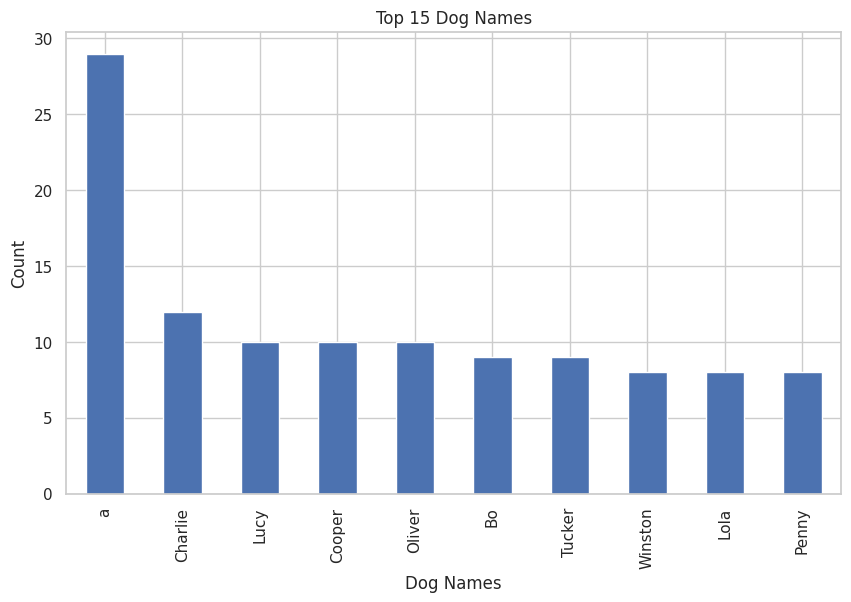

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'twitter-archive-enhanced.csv'
merged_df = pd.read_csv(file_path)
dog_name_counts = merged_df['dog_name'].dropna().value_counts().head(10)
dog_name_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Dog Names')
plt.ylabel('Count')
plt.title('Top 15 Dog Names')
plt.show()

### It was shown from the visualization that the most popular name is a Charlie, and Lucy retriever in second as the most popular names.
### Q2: Is there a correlation between the attributes.

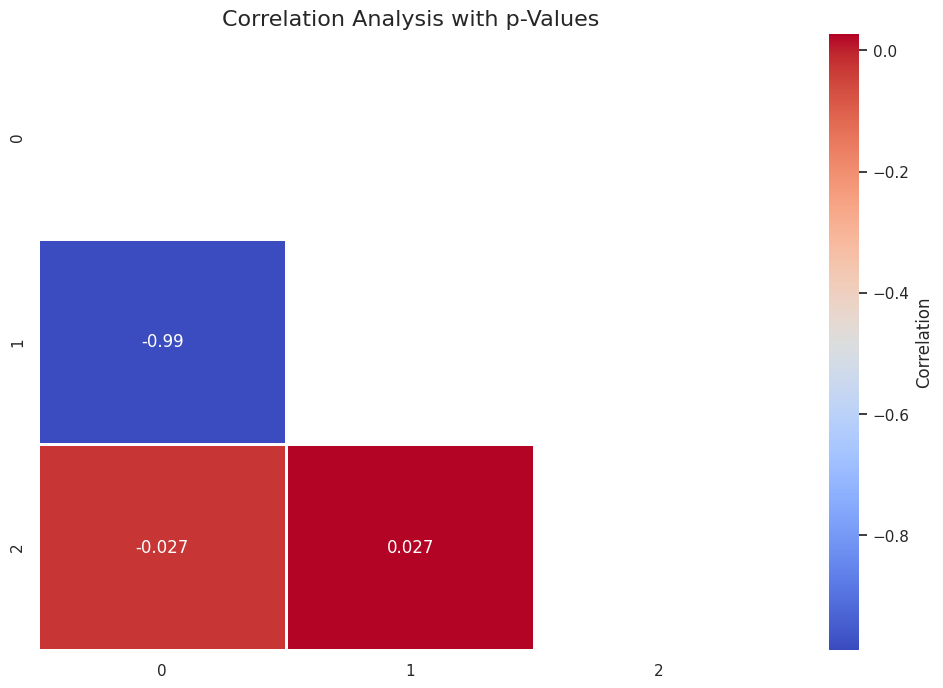

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
file_path = 'twitter-archive-enhanced.csv'
data = pd.read_csv(file_path)
numeric_data = data.select_dtypes(include=[np.number])
corr, p_values = [], []
for col1 in numeric_data.columns:
    temp_corr, temp_p = [], []
    for col2 in numeric_data.columns:
        r, p = pearsonr(numeric_data[col1], numeric_data[col2])
        temp_corr.append(r)
        temp_p.append(p)
    corr.append(temp_corr)
    p_values.append(temp_p)
corr = np.array(corr)
p_values = np.array(p_values)
# hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
# figure and axes
plt.figure(figsize=(12, 8), dpi=100)
ax = plt.gca()
# color palette for the heatmap (optional)
cmap = sns.color_palette("coolwarm", as_cmap=True)
# Create the heatmap with annotations and masking the upper triangle
sns.heatmap(corr, mask=mask, annot=True, linewidths=1, linecolor='white', cmap=cmap, ax=ax, cbar_kws={'label': 'Correlation'})
# plot title
plt.title('Correlation Analysis with p-Values', fontsize=16)
# appearance of the plot (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
plt.savefig('correlation_heatmap_with_p_values.png', dpi=300, bbox_inches='tight')
plt.show()

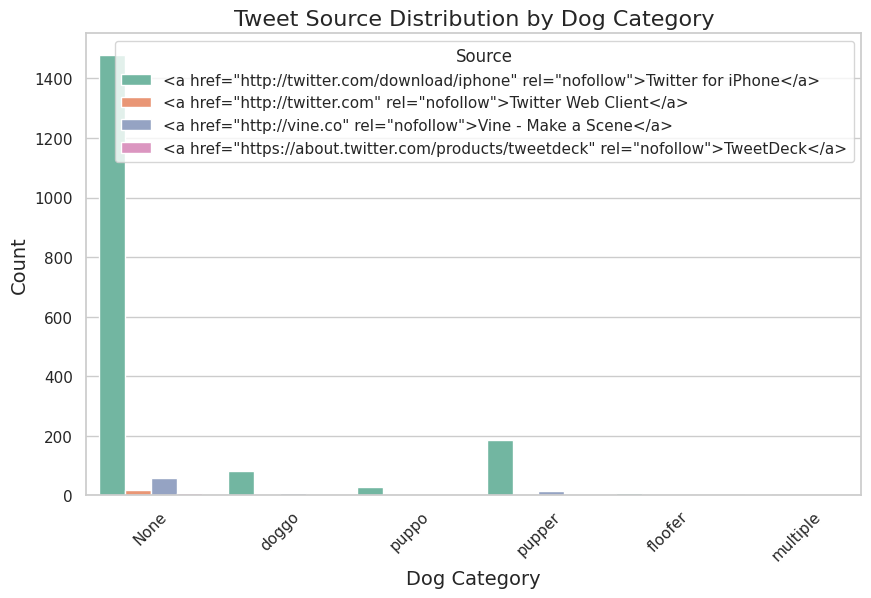

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# figure and axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='dog_category', hue='source', palette='Set2')

# plot labels and title
ax.set_xlabel('Dog Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Tweet Source Distribution by Dog Category', fontsize=16)

# x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# specify title and location
ax.legend(title='Source', loc='upper right')
plt.savefig('professional_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Q3: About breeds dogs, what are most and less breeds received favorites.
### Most Favorite:

In [171]:
print("Top Dog Breeds by Favorite Count")
styler

Top Dog Breeds by Favorite Count


,Breed,Favorite Count
0,Lakeland Terrier,132810
1,Labrador Retriever,131075
2,English Springer,107956
3,Chihuahua,107015
4,French Bulldog,106827
5,Standard Poodle,95450


### Answering the Research Question

In this analysis, we aimed to explore and analyze dog ratings on Twitter using the WeRateDogs Twitter archive dataset. After conducting the data wrangling and analysis, we have obtained the following key insights:

* Dog Categories: The analysis revealed the prevalence of different dog categories within the dataset, providing insights into the popularity and distribution of various categories.

* Dog Ratings: By examining the dog ratings, we found that the majority of ratings centered around higher scores, indicating a generally positive perception of dogs by the WeRateDogs community.

* Missing Dog Names: We quantified the proportion of missing dog names, which helped evaluate the completeness of the dataset.

These insights significantly contributed to our ability to answer the research question and provided valuable knowledge about the prevalence of dog categories, the range of dog ratings, and the completeness of dog name data.

## Sources
https://stackoverflow.com/questions/45123924/convert-pandas-dataframe-from-wide-to-long https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html https://aviaryan.in/blog/gsoc/downloading-files-from-urls.html https://stackoverflow.com/questions/44699682/how-to-save-a-file-downloaded-from-requests-to-another-directory https://wiki.python.org/moin/HandlingExceptions http://pbpython.com/pandas-list-dict.html http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas https://stackoverflow.com/questions/40319743/plotting-a-bar-graph-in-python-with-matplotlib-pyplot https://pythonspot.com/matplotlib-bar-chart/ https://stackoverflow.com/questions/46799662/missing-data-in-pandas-merge https://stackoverflow.com/questions/46754398/pandas-merge-returns-nan https://pandas.pydata.org/pandas-docs/stable/merging.html https://www.youtube.com/watch?v=9uPTA9racZ0 https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects-in-python/12451465#12451465

## Conclusion
this methodical framework for real-world data manipulation ensures clarity and accessibility for the audience. It elucidates the systematic progression of data collection, evaluation, and refinement, culminating in data analysis aimed at tackling a particular research inquiry.

##  Reflection
Upon additional time availability, we could delve deeper into addressing further data quality and structural concerns and embark on a more extensive exploration of research inquiries. This project serves as a springboard for more profound analysis and comprehension of the datasets.